                 Open       High        Low      Close        Volume
Date                                                                
2022-06-03  146.45300  147.52000  144.02100  144.93800  8.884045e+07
2022-06-02  147.38100  150.81000  146.41300  150.75000  7.256873e+07
2022-06-01  149.44400  151.27900  147.23100  148.25800  7.451323e+07
2022-05-31  148.61600  150.20200  146.39300  148.38800  1.040348e+08
2022-05-27  144.94800  149.22400  144.81900  149.18500  9.125601e+07
...               ...        ...        ...        ...           ...
2010-01-08    6.40586    6.45421    6.36458    6.45401  5.246856e+08
2010-01-07    6.44444    6.45421    6.36409    6.41085  5.588893e+08
2010-01-06    6.52639    6.55241    6.41553    6.42221  6.452991e+08
2010-01-05    6.53905    6.56358    6.49230    6.52639  7.055130e+08
2010-01-04    6.49958    6.53008    6.46597    6.51522  5.764890e+08

[3127 rows x 5 columns]
Date
2022-06-03         NaN
2022-06-02         NaN
2022-06-01         NaN
2022

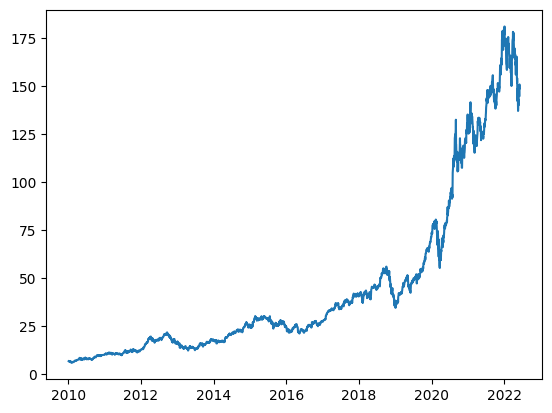

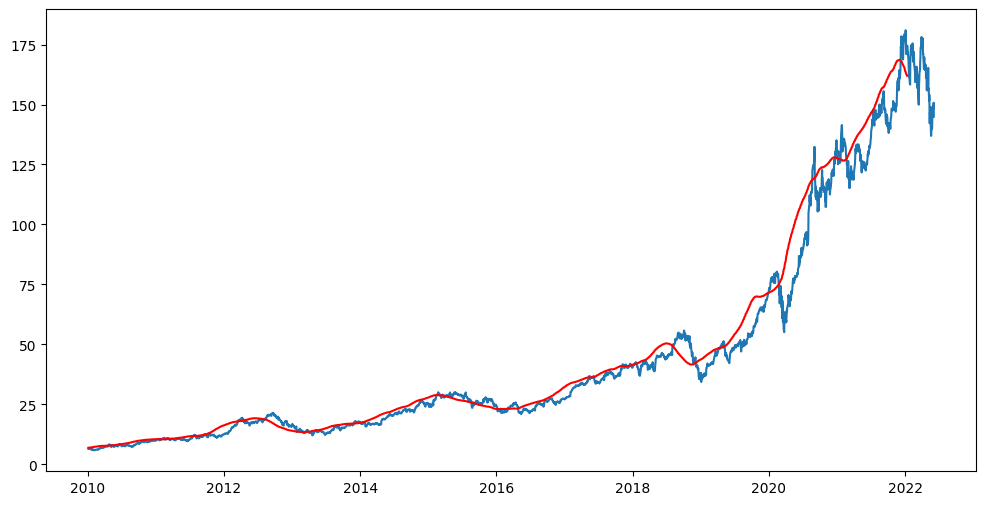

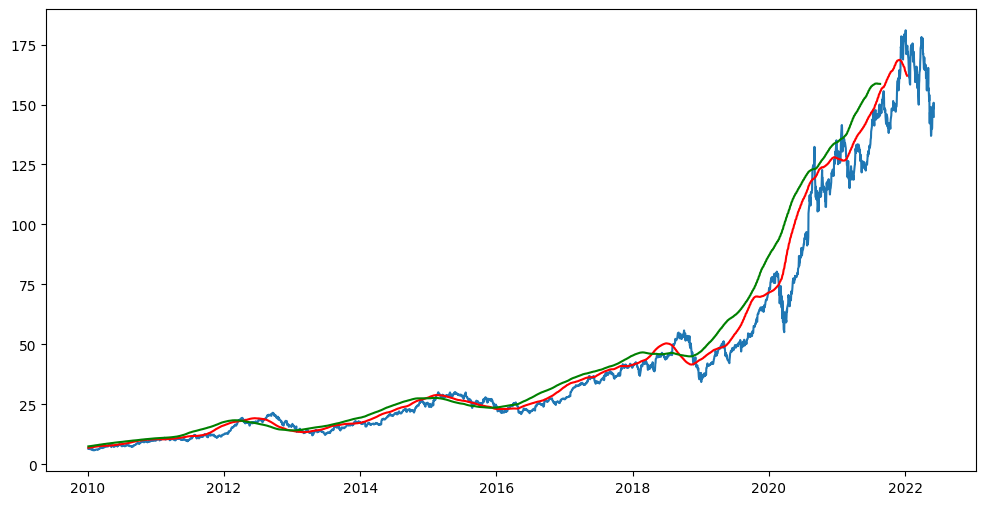

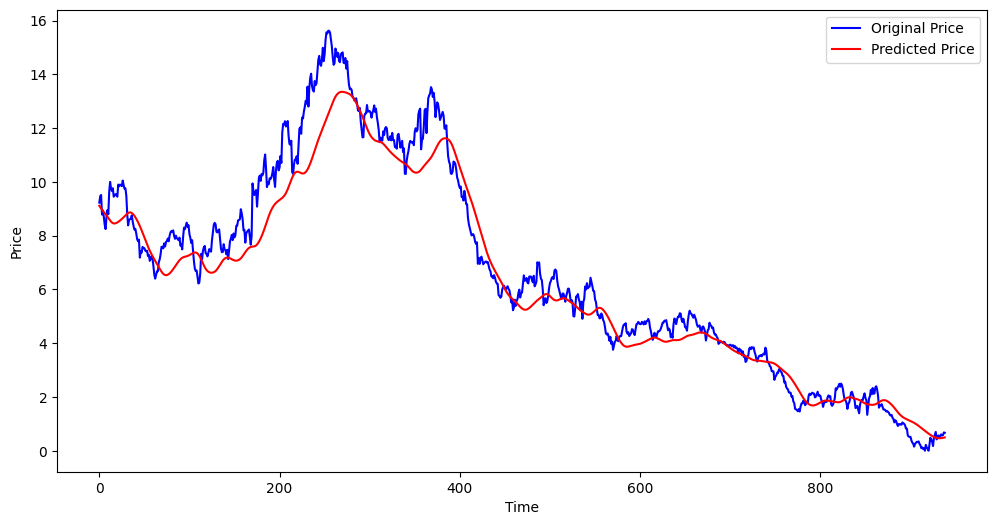

<IPython.core.display.Javascript object>


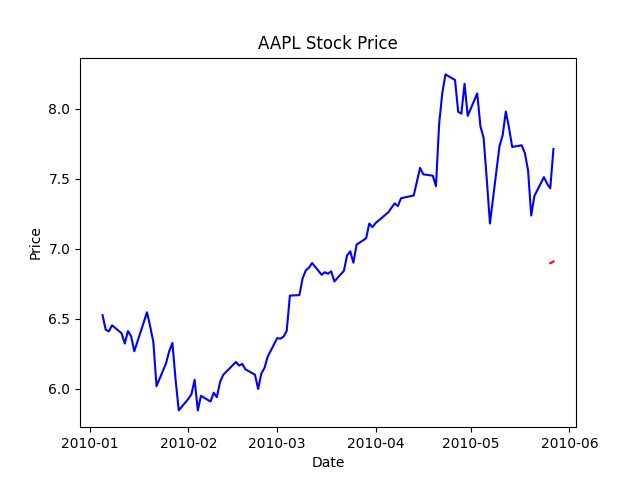

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import matplotlib.animation as animation
import tensorflow

start ='2010-01-01'
end ='2022-6-3'

df=data.DataReader("AAPL", 'stooq', start, end)
#df=df.to_frame()
df.head()
#df2 = df.sort_values(by='Date', inplace = True) 
print(df)
#df.head()
#df=df.drop('Date', axis=1)
#df.head()
plt.plot(df.Close)

ma100=df.Close.rolling(100).mean()
print(ma100)

plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

ma200=df.Close.rolling(200).mean()
print(ma200)

plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

#Splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

#import sklearn
scaler=MinMaxScaler(feature_range=(0,1))

data_training_array=scaler.fit_transform(data_training)
data_training_array

x_train=[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)

#ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model=Sequential()


model.add(LSTM(units=50, activation ='relu', return_sequences=True, input_shape=(x_train.shape[1],1) ))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation ='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation ='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation ='relu' ))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=10)

#model.save('keras_model.h5')

past_100days=data_training.tail(100)

final_df=pd.concat([past_100days,data_testing], ignore_index=True)

final_df.head()

input_data=scaler.fit_transform(final_df)
input_data

input_data.shape

x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

#Making predictions

y_predicted=model.predict(x_test)

y_predicted.shape

y_test

y_predicted

scaler.scale_

scale_factor=1/0.06402036
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

%matplotlib notebook
df2 = df.iloc[::-1]
ma1002=df2.Close.rolling(100).mean()
ma2002=df2.Close.rolling(200).mean()
fig = plt.figure()

#print(df['Close'][:i])
def animate(i):
    # Plot the first i data points
    plt.cla()
    
    plt.plot(df2['Close'][i:i+100], 'b')
    plt.plot(ma1002[i:i+100], 'r')
    plt.plot(ma2002[i:i+100:], 'g')
    #plt.gca().invert_xaxis()
    plt.title('AAPL Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price')

# Set up the figure and animation

ani =animation.FuncAnimation(fig, animate, frames=len(df), interval=100)

# Show the animated graph

plt.show()
